In [1]:
#Basic
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import re

#Text processing
import nltk as nl
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

#Feature extraction and data preparation for model
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

#Model
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier

#Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [2]:
#Download resources from nltk
nl.download('wordnet')
nl.download('omw-1.4')
nl.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Rohit K
[nltk_data]     Rajgarhia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Rohit K
[nltk_data]     Rajgarhia\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rohit K
[nltk_data]     Rajgarhia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

In [4]:
#Stop Words
print(stop_words[:10])
print("No of stop words: ", len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
No of stop words:  179


In [5]:
# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]
#words = ["likes", "liked", "likely", "liking"]
# words = ['amazement', 'amaze', 'amazed']
for w in words:
    print(w, " : ", stemmer.stem(w))

program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


In [6]:
words = ["program", "programs", "programmer", "programming", "programmers"]
#words = ["likes", "liked", "likely", "liking"]
#words = ['amazement', 'amaze', 'amazed']
for w in words:
    print(w, " : ", lemmatizer.lemmatize(w))

program  :  program
programs  :  program
programmer  :  programmer
programming  :  programming
programmers  :  programmer


In [7]:
print("better :", lemmatizer.lemmatize("better", pos ="a"))

better : good


In [8]:
#Amazon Data
dataset1 = pd.read_table("amazon_cells_labelled.txt")
dataset1.head()

,So there is no way for me to plug it in here in the US unless I go by a converter.,0
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [9]:
#Preprocessing and naming columns
new_row=pd.DataFrame({dataset1.columns[0]:dataset1.columns[0],dataset1.columns[1]:dataset1.columns[1]},index=[0])
dataset1=pd.concat([new_row, dataset1]).reset_index(drop = True)
dataset1.columns=['text','label_num']
dataset1.head()

,text,label_num
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [10]:
#imdb data
dataset2=pd.read_table('imdb_labelled.txt')
dataset2.head()

,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0


In [11]:
#Preprocessing and naming columns
new_row=pd.DataFrame({dataset2.columns[0]:dataset2.columns[0],dataset2.columns[1]:dataset2.columns[1]},index=[0])
dataset2=pd.concat([new_row, dataset2]).reset_index(drop = True)
dataset2.columns=['text','label_num']
dataset2.head()

,text,label_num
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [12]:
#yelp data
dataset3 = pd.read_table("yelp_labelled.txt")
dataset3.head()

,Wow... Loved this place.,1
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0


In [13]:
#Preprocessing and naming columns
new_row=pd.DataFrame({dataset3.columns[0]:dataset3.columns[0],dataset3.columns[1]:dataset3.columns[1]},index=[0])
dataset3=pd.concat([new_row, dataset3]).reset_index(drop = True)
dataset3.columns=['text','label_num']
dataset3.head()

,text,label_num
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [75]:
#Concatenating data
dataset=pd.concat([dataset1,dataset2,dataset3]).reset_index(drop = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2748 non-null   object
 1   label_num  2748 non-null   object
dtypes: object(2)
memory usage: 43.1+ KB


In [76]:
#fINAL DATASET
dataset.head()

,text,label_num
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [77]:
dataset.shape

(2748, 2)

In [106]:
#The clean text function allows you to convert all letters to lowercase, 
#remove numbers, punctuation and all words that have less than 3 characters
def clean_text(text):
    new_text=text.lower()
    clean_text= re.sub("[^a-z]+"," ",new_text)
    clean_text_stop_removed = ""
    for w in clean_text.split(" ")[0:]:
        if not w in stop_words and len(w) >= 3:
            clean_text_stop_removed += w
            clean_text_stop_removed += " "
            clean_text_stop_removed=lemmatizer.lemmatize(clean_text_stop_removed)
            clean_text_stop_removed=stemmer.stem(clean_text_stop_removed)
    return clean_text_stop_removed


In [107]:
print("Before Cleaning:",dataset['text'][20])
print("After Cleaning:",clean_text(dataset['text'][20]))

Before Cleaning: I went on Motorola's website and followed all directions, but could not get it to pair again.
After Cleaning: went motorola website followed directions could get pair 


In [108]:
#Apply the function on total dataset
dataset["text_clean"] = dataset.text.apply(clean_text)

In [109]:
dataset.head()

,text,label_num,text_clean
0,So there is no way for me to plug it in here i...,0,way plug unless converter
1,"Good case, Excellent value.",1,good case excellent value
2,Great for the jawbone.,1,great jawbone
3,Tied to charger for conversations lasting more...,0,tied charger conversations lasting minutes maj...
4,The mic is great.,1,mic great


In [110]:
#ADDING LENGTH COLUMNS
dataset_clean = dataset.drop(dataset.columns[0:1],axis=1)
#Add length feature
dataset_clean['len'] = dataset_clean['text_clean'].str.len()

In [111]:
dataset_clean.head()

,label_num,text_clean,len
0,0,way plug unless converter,26
1,1,good case excellent value,26
2,1,great jawbone,14
3,0,tied charger conversations lasting minutes maj...,58
4,1,mic great,10


In [112]:
dataset_clean.label_num=dataset_clean.label_num.astype('int')
dataset_clean.label_num.unique()

array([0, 1])

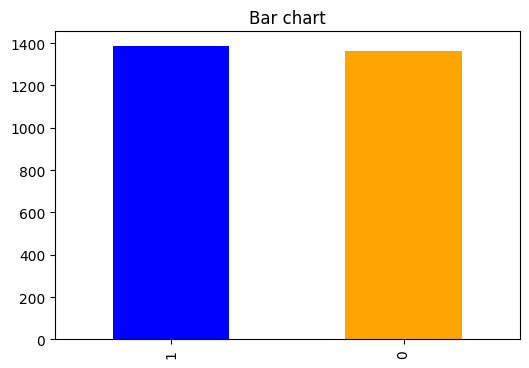

In [113]:
#Bar plot of class labels
plt.rcParams['figure.figsize'] = (6, 4)
count_Class=pd.value_counts(dataset_clean["label_num"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

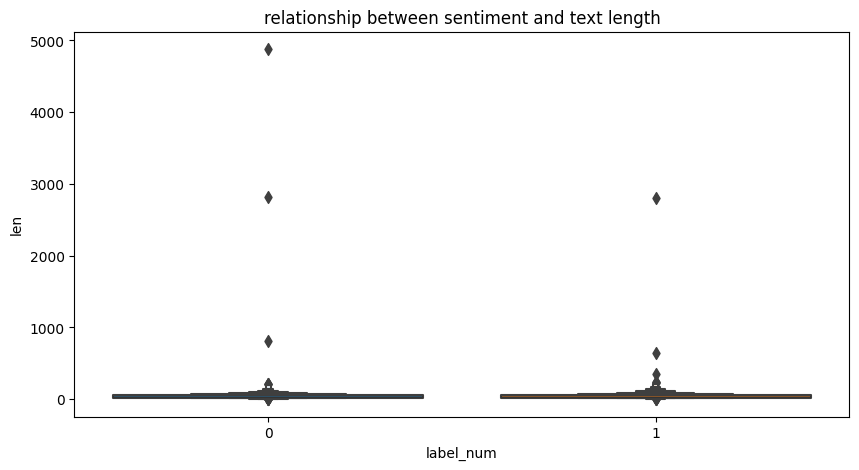

In [114]:
# It is similar to a box plot in plotting a nonparametric representation 
#of a distribution in which all features correspond to actual observations. 
#By plotting more quantiles, it provides more information about the shape 
#of the distribution, particularly in the tails.
plt.rcParams['figure.figsize'] = (10, 5)
sns.boxenplot(x = dataset_clean['label_num'], y = dataset_clean['len'])
plt.title('relationship between sentiment and text length')
plt.show()

In [115]:
count1 = Counter(" ".join(dataset_clean[dataset_clean['label_num']==0]["text_clean"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in negative sentiment", 1 : "count"})
count2 = Counter(" ".join(dataset_clean[dataset_clean['label_num']==1]["text_clean"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in positive sentiment", 1 : "count_"})

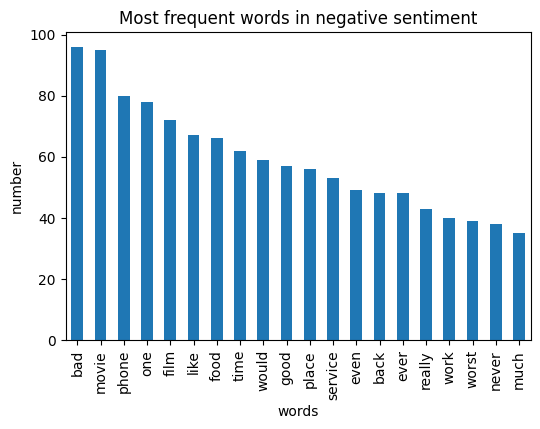

In [116]:
plt.rcParams['figure.figsize'] = (6, 4)
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in negative sentiment"]))
plt.xticks(y_pos, df1["words in negative sentiment"])
plt.title('Most frequent words in negative sentiment')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

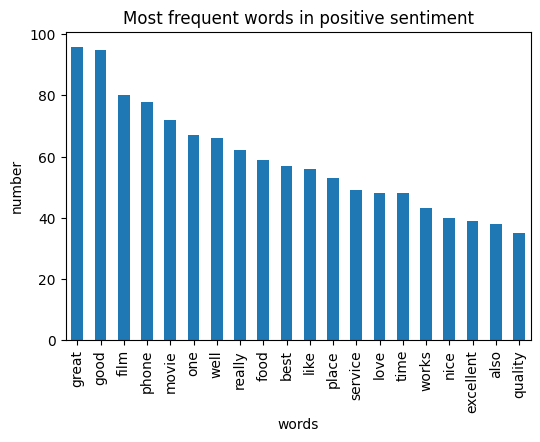

In [117]:
plt.rcParams['figure.figsize'] = (6, 4)
df1.plot.bar(legend = False)
y_pos = np.arange(len(df2["words in positive sentiment"]))
plt.xticks(y_pos, df2["words in positive sentiment"])
plt.title('Most frequent words in positive sentiment')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

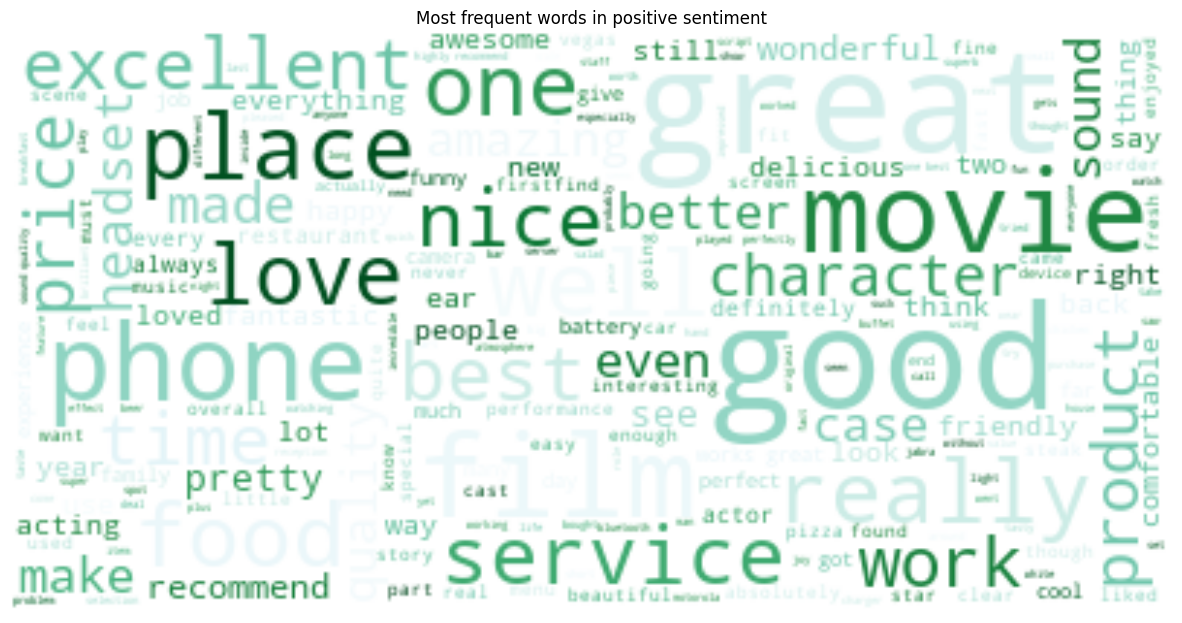

In [118]:
from wordcloud import WordCloud

# text = ' '.join(dataset_mails_clean.text_clean.values)
text = ' '.join(dataset_clean[dataset_clean['label_num']==1].text_clean.values)

wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white",  colormap='BuGn').generate(text.lower())
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Most frequent words in positive sentiment')
plt.axis("off")
plt.show()

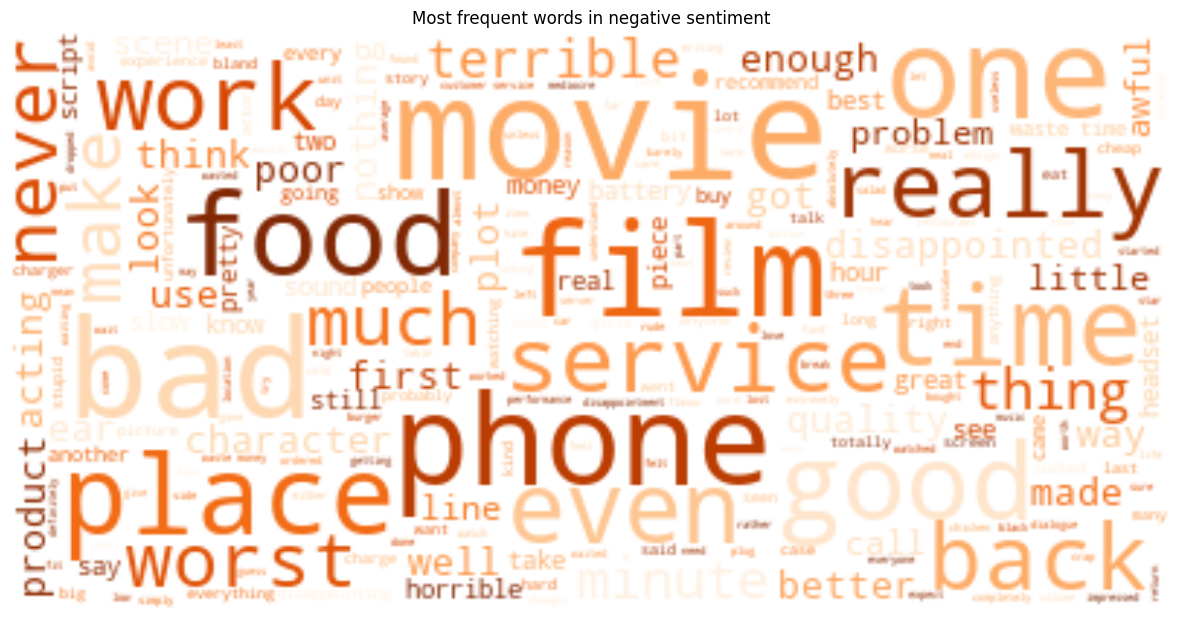

In [119]:
from wordcloud import WordCloud

# text = ' '.join(dataset_mails_clean.text_clean.values)
text = ' '.join(dataset_clean[dataset_clean['label_num']==0].text_clean.values)

wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white",  colormap='Oranges_r').generate(text.lower())
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Most frequent words in negative sentiment')
plt.axis("off")
plt.show()

In [120]:
x = dataset_clean['text_clean']
y = dataset_clean['label_num']

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [122]:
print(x_train.shape, x_test.shape)

(2198,) (550,)


In [123]:
print("Samples per class in train {}".format(np.bincount(y_train)))
print("Samples per class in test {}".format(np.bincount(y_test)))

Samples per class in train [1088 1110]
Samples per class in test [274 276]


In [124]:
# Using tf-idf vectorizer
bow_vec = TfidfVectorizer(stop_words=stop_words)

In [125]:
train_bow = bow_vec.fit_transform(x_train)
test_bow = bow_vec.transform(x_test)

In [126]:
cv_df = pd.DataFrame(train_bow.toarray(),columns = bow_vec.get_feature_names_out())
cv_df.head()

,abandoned,ability,able,abound,abroad,absolutel,absolutely,absolutley,abstruse,abysmal,...,young,younger,youtube,yucky,yukon,yummy,yun,zero,zillion,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
feature_names = bow_vec.get_feature_names_out()
print("Number of features: {}".format(len(feature_names)))

Number of features: 4248


In [128]:
## Preparing to make a pipeline 
models = {
    'Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB()
}

params = {
    'Naive Bayes': { 'alpha': [0.5, 100], 'fit_prior': [True, False]},
     'Bernoulli Naive Bayes': { 'alpha': [0.5, 100], 'fit_prior': [True, False] }
}

In [129]:
# Use multiple classifiers and grid search for prediction
def ML_modeling(models, params, X_train, X_test, y_train, y_test, performance_metrics):    
    
    if not set(models.keys()).issubset(set(params.keys())):
        raise ValueError('Some estimators are missing parameters')

    for key in models.keys():
    
        model = models[key]
        param = params[key]

        gs = GridSearchCV(model, param, cv=15, error_score=0, refit=True)
        gs.fit(X_train, y_train)
        y_pred = gs.predict(X_test)
        
        # Print scores for the classifier
        accuracy_sc = accuracy_score(y_test, y_pred)
        precision_sc= precision_score(y_test, y_pred, average='macro')
        recall_sc = recall_score(y_test, y_pred, average='macro')
        f1_sc =  f1_score(y_test, y_pred, average='macro')
        
        performance_metrics.append([key,accuracy_sc,precision_sc,recall_sc,f1_sc])
        print(key, ':', gs.best_params_)
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t\tF1: %1.3f\n" % (accuracy_sc, precision_sc, recall_sc, f1_sc))

        sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,  fmt='g')
        plt.show()
        
    return 

==============Bag of Words==============

Naive Bayes : {'alpha': 0.5, 'fit_prior': False}
Accuracy: 0.782 	Precision: 0.783 	Recall: 0.782 		F1: 0.782



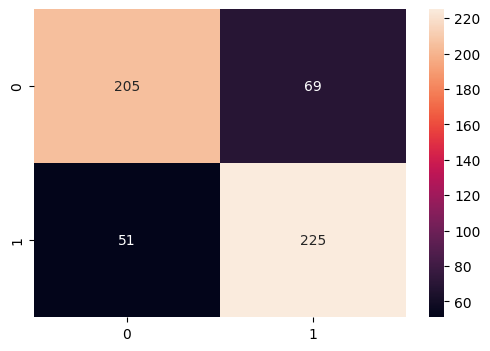

Bernoulli Naive Bayes : {'alpha': 0.5, 'fit_prior': False}
Accuracy: 0.773 	Precision: 0.773 	Recall: 0.773 		F1: 0.773



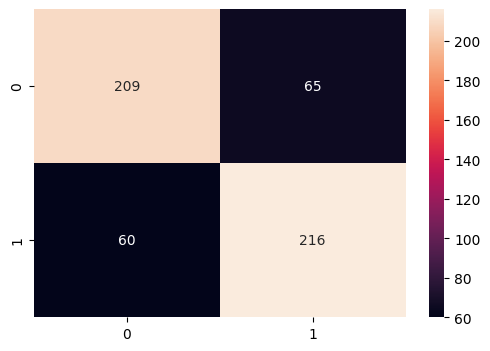

In [130]:
performance_metrics_bow = []
print("==============Bag of Words==============\n")
ML_modeling(models, params, train_bow, test_bow, y_train, y_test, performance_metrics_bow)
metrics_bow_df = pd.DataFrame(performance_metrics_bow,columns=['Model' , 'Accuracy', 'Precision' , 'Recall', "F1 Score"])

In [131]:
metrics_bow_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.781818,0.783044,0.781696,0.781529
1,Bernoulli Naive Bayes,0.772727,0.772817,0.772691,0.772690
